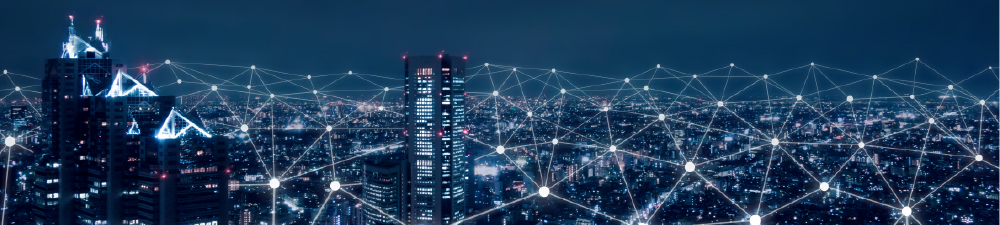

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

%matplotlib inline

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_excel("Mini_project_3_Data.xlsx")

## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

cust_df.describe()

cust_df.info()

cust_df.head()

(51047, 58)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
# Replace 'Unknown' entries in HandsetPrice feature to zeros and check that dtype is integer
cust_df.HandsetPrice.replace("Unknown", 0, inplace=True)
cust_df.head()
cust_df.info()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,0,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [5]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df.MonthlyRevenue.isna().value_counts()
# cust_df.MonthlyRevenue.dropna(inplace = True)
cust_df = cust_df[cust_df['MonthlyRevenue'].notna()]
cust_df.shape


False    50891
True       156
Name: MonthlyRevenue, dtype: int64

(50891, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [6]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
round(cust_df.apply(lambda x: sum(x.isnull()),axis=0) / cust_df.shape[0]*100,3)


CustomerID                   0.000
Churn                        0.000
MonthlyRevenue               0.000
MonthlyMinutes               0.000
TotalRecurringCharge         0.000
DirectorAssistedCalls        0.000
OverageMinutes               0.000
RoamingCalls                 0.000
PercChangeMinutes            0.415
PercChangeRevenues           0.415
DroppedCalls                 0.000
BlockedCalls                 0.000
UnansweredCalls              0.000
CustomerCareCalls            0.000
ThreewayCalls                0.000
ReceivedCalls                0.000
OutboundCalls                0.000
InboundCalls                 0.000
PeakCallsInOut               0.000
OffPeakCallsInOut            0.000
DroppedBlockedCalls          0.000
CallForwardingCalls          0.000
CallWaitingCalls             0.000
MonthsInService              0.000
UniqueSubs                   0.000
ActiveSubs                   0.000
ServiceArea                  0.047
Handsets                     0.002
HandsetModels       

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
    
    Replace NaN with zero

In [7]:
cust_df.replace(np.nan, 0, inplace=True)
round(cust_df.apply(lambda x: sum(x.isnull()),axis=0) / cust_df.shape[0]*100,3)

CustomerID                   0.0
Churn                        0.0
MonthlyRevenue               0.0
MonthlyMinutes               0.0
TotalRecurringCharge         0.0
DirectorAssistedCalls        0.0
OverageMinutes               0.0
RoamingCalls                 0.0
PercChangeMinutes            0.0
PercChangeRevenues           0.0
DroppedCalls                 0.0
BlockedCalls                 0.0
UnansweredCalls              0.0
CustomerCareCalls            0.0
ThreewayCalls                0.0
ReceivedCalls                0.0
OutboundCalls                0.0
InboundCalls                 0.0
PeakCallsInOut               0.0
OffPeakCallsInOut            0.0
DroppedBlockedCalls          0.0
CallForwardingCalls          0.0
CallWaitingCalls             0.0
MonthsInService              0.0
UniqueSubs                   0.0
ActiveSubs                   0.0
ServiceArea                  0.0
Handsets                     0.0
HandsetModels                0.0
CurrentEquipmentDays         0.0
AgeHH1    

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

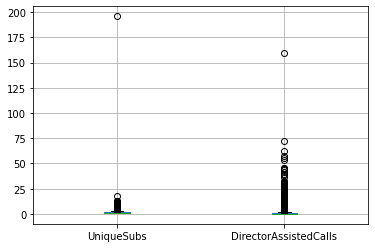

In [8]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

Upper_limit =  3.5 
Lower_limit = -0.5


<AxesSubplot:>

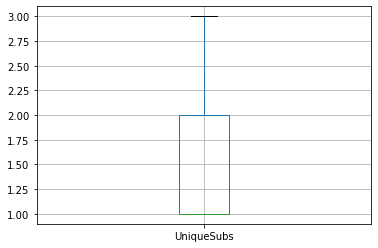

In [9]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

# https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
# Computing IQR for UniqueSubs
Q1 = cust_df['UniqueSubs'].quantile(0.25)
Q3 = cust_df['UniqueSubs'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print('Upper_limit = ', upper_limit, '\nLower_limit =', lower_limit)

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
cust_df = cust_df.query('(@Q1 - 1.5 * @IQR) <= UniqueSubs <= (@Q3 + 1.5 * @IQR)')
cust_df.boxplot('UniqueSubs')


Upper_limit =  2.4749999999999996 
Lower_limit = -1.4849999999999999


<AxesSubplot:>

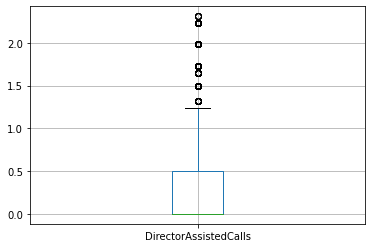

In [10]:
# Computing IQR for DirectorAssistedCalls
Q1 = cust_df['DirectorAssistedCalls'].quantile(0.25)
Q3 = cust_df['DirectorAssistedCalls'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print('Upper_limit = ', upper_limit, '\nLower_limit =', lower_limit)

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
cust_df = cust_df.query('(@Q1 - 1.5 * @IQR) <= DirectorAssistedCalls <= (@Q3 + 1.5 * @IQR)')
cust_df.boxplot('DirectorAssistedCalls')


## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

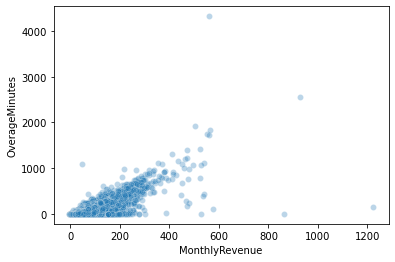

In [11]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df, alpha=0.3)

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis

    Cannot tell
    

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

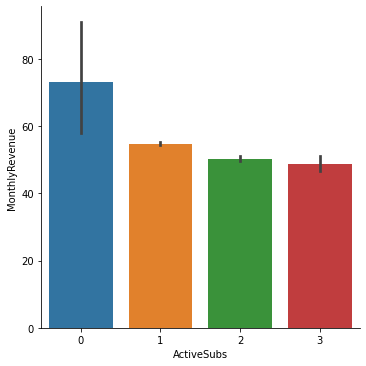

In [12]:
#use category plot to plot monthly revenue for each active subs category

# https://seaborn.pydata.org/generated/seaborn.catplot.html
# sns.catplot(x="ActiveSubs", y="MonthlyRevenue", kind="bar", data=cust_df.query('ActiveSubs != 0'))
sns.catplot(x="ActiveSubs", y="MonthlyRevenue", kind="bar", data=cust_df)

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis
    
    Active subs on average lead to lower monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

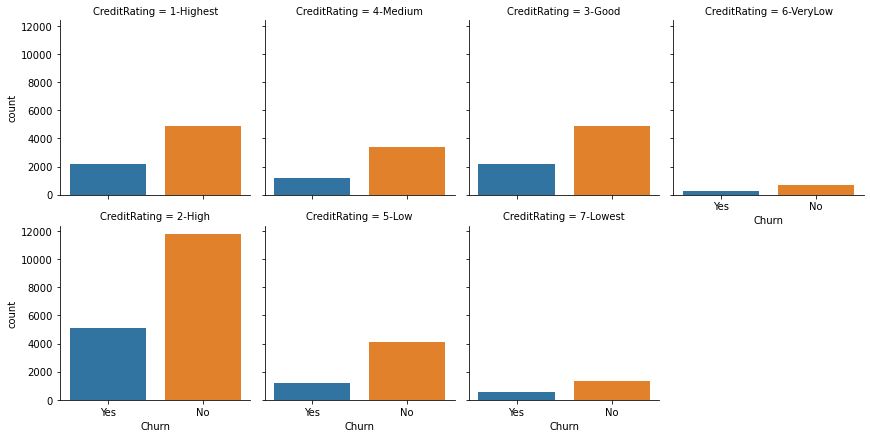

In [13]:
sns.catplot(x="Churn", col="CreditRating", col_wrap=4,
                data=cust_df,
                kind="count", height=3, aspect=1)


<mark>__Result:__
    
Type your interpretation here based on the analysis above
    
    Credit Rating = 2 most likely to churn

### Placeholder for additional exploratory analysis

                           CustomerID  MonthlyRevenue  MonthlyMinutes  \
CustomerID                   1.000000        0.013351        0.109147   
MonthlyRevenue               0.013351        1.000000        0.665558   
MonthlyMinutes               0.109147        0.665558        1.000000   
TotalRecurringCharge         0.081033        0.607971        0.535573   
DirectorAssistedCalls        0.003117        0.259909        0.258738   
OverageMinutes               0.012670        0.763084        0.530142   
RoamingCalls                 0.005301        0.321589        0.098471   
PercChangeMinutes           -0.009598       -0.018720       -0.033230   
PercChangeRevenues           0.005480       -0.015870       -0.025284   
DroppedCalls                 0.074093        0.397913        0.574747   
BlockedCalls                 0.044667        0.205119        0.307616   
UnansweredCalls              0.097084        0.407854        0.625751   
CustomerCareCalls            0.113826        0.1803

<AxesSubplot:>

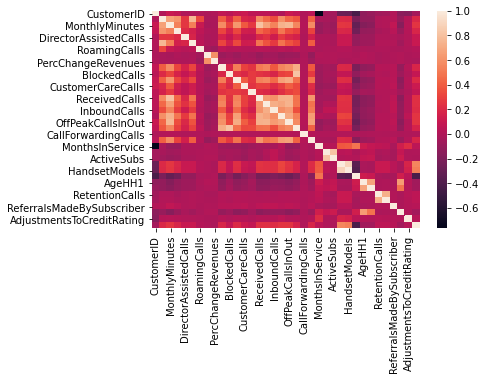

In [14]:
#type your code here for any additional exploratory analysis (if any)

# ignore exploratory analysis codes
print(cust_df.corr())
sns.heatmap(cust_df.corr())

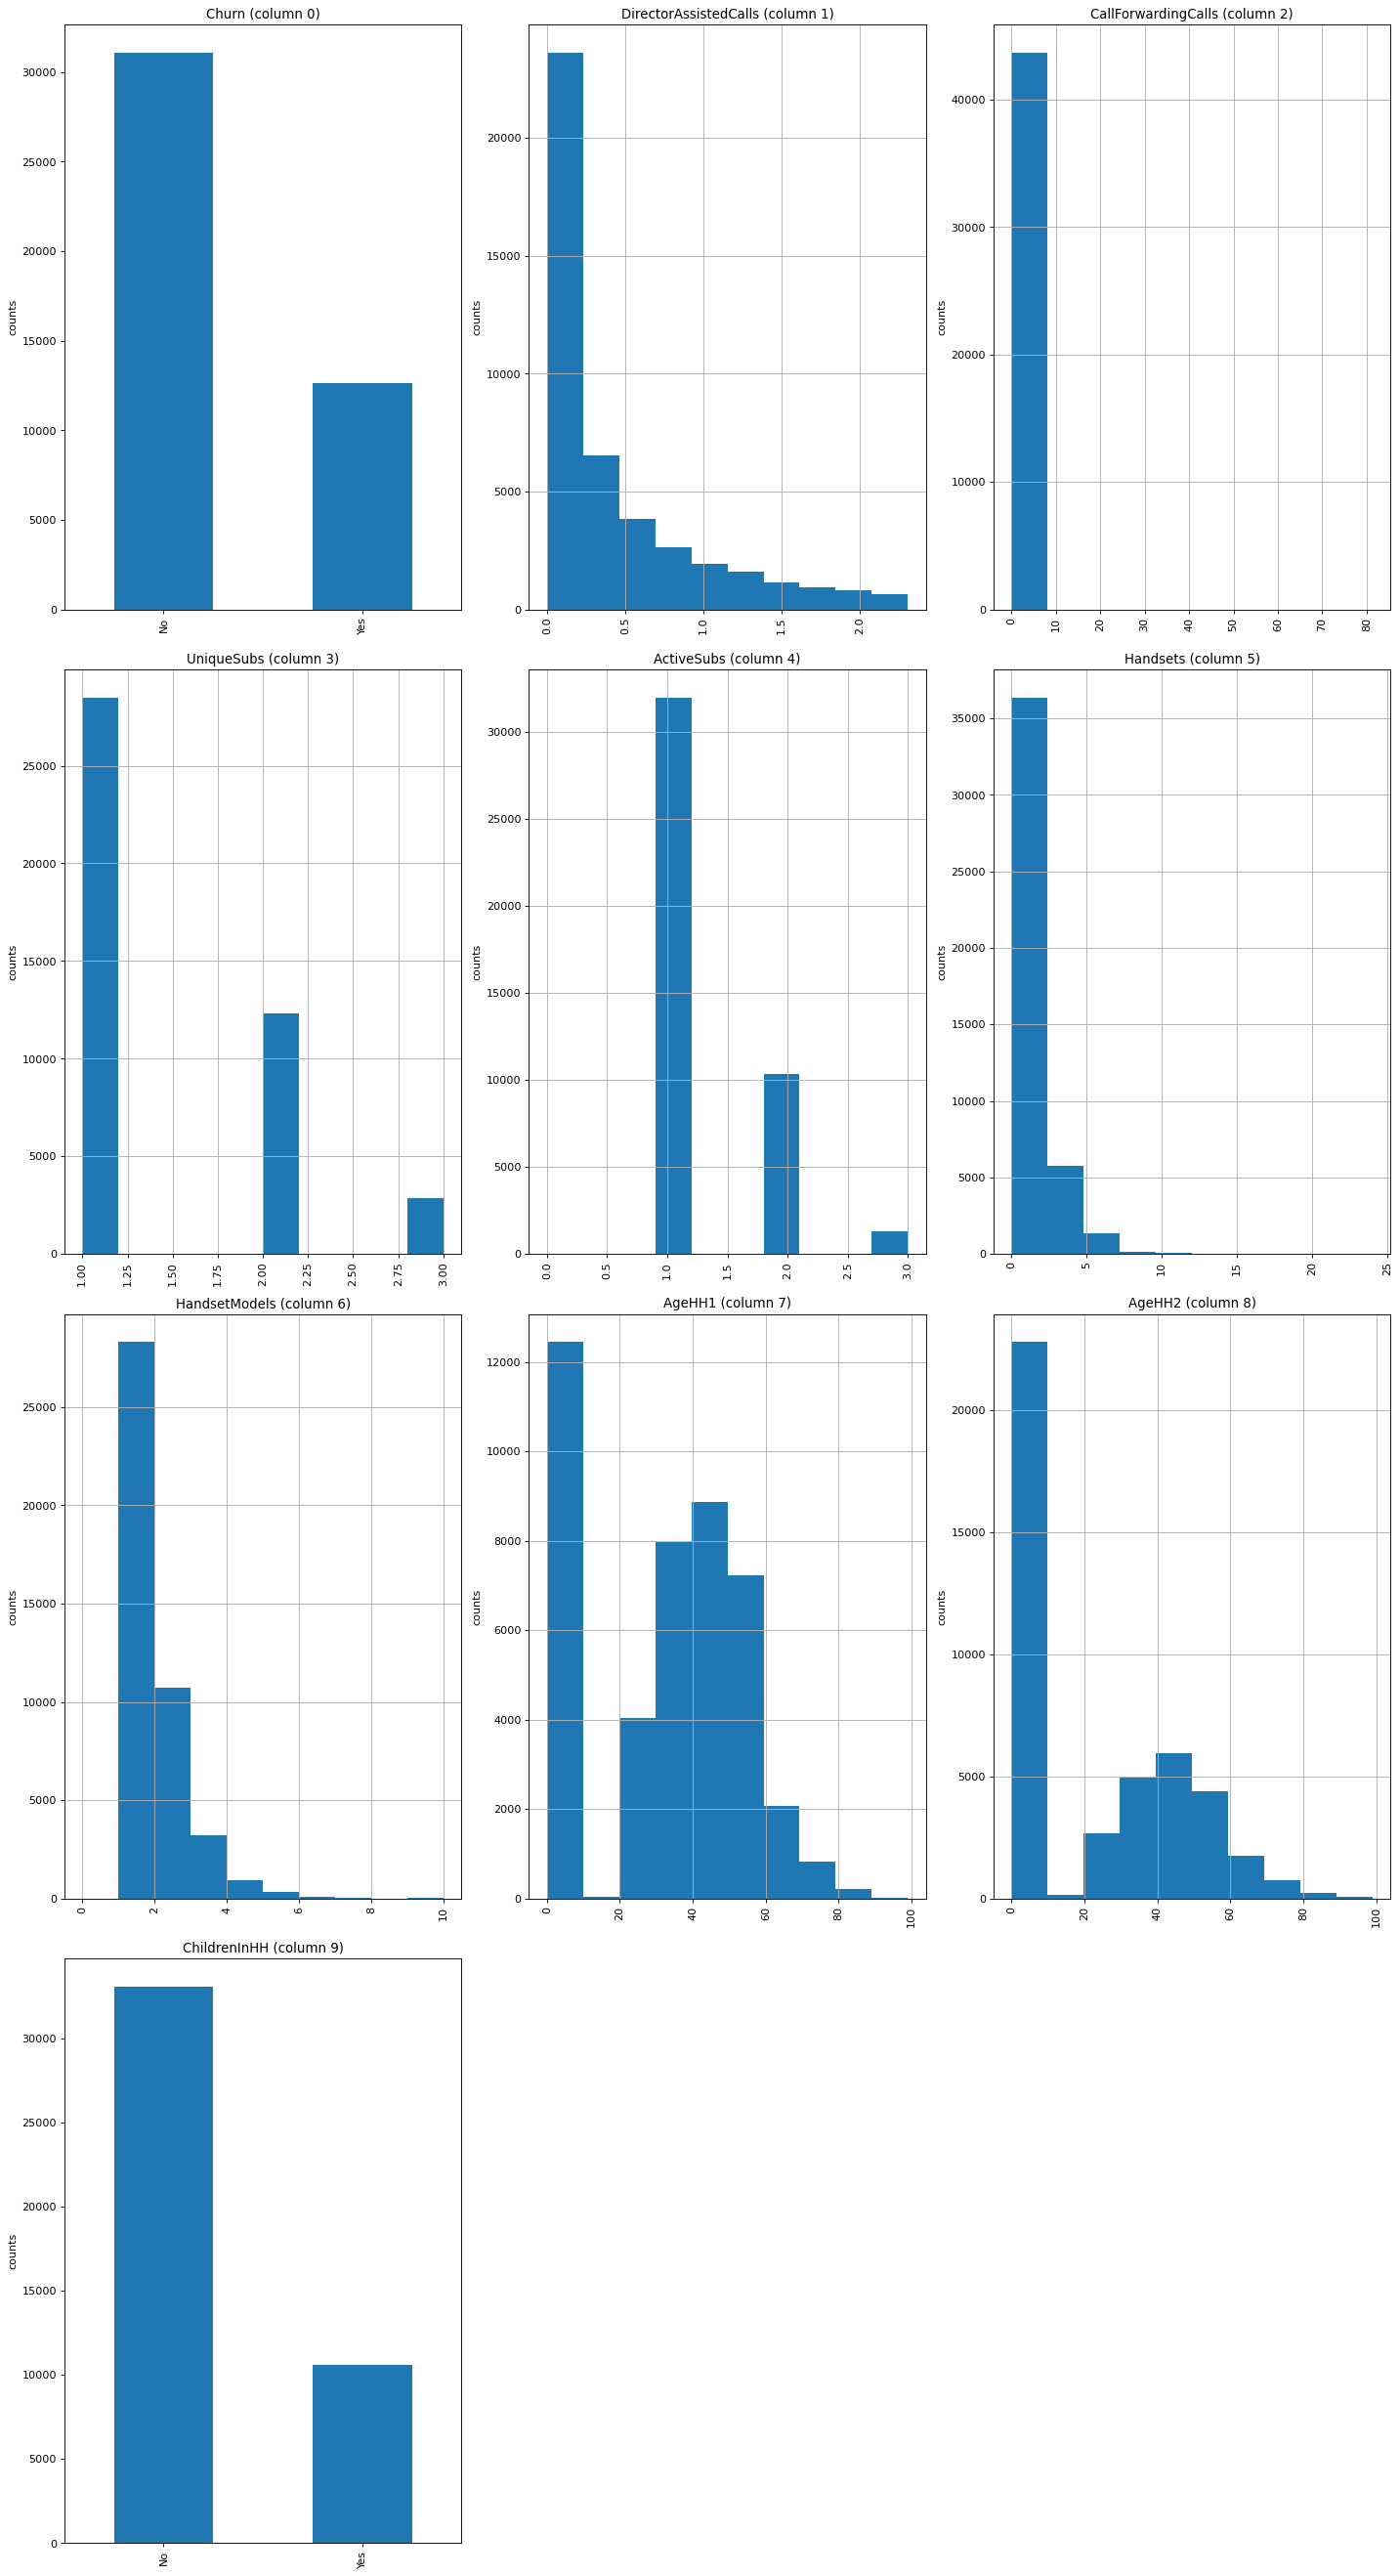

In [15]:
# IU4.6.6 starter-2015-flight-delays-and-45a4bcdc-f
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(cust_df, 10, 3)

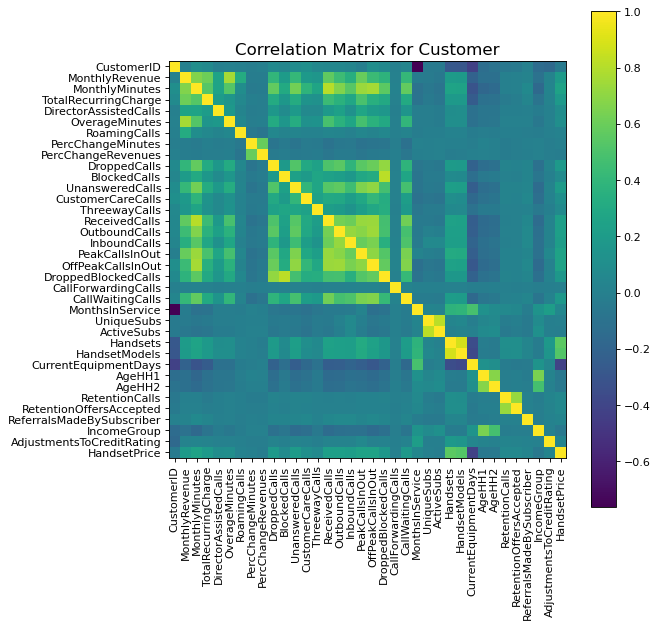

In [17]:
def plotCorrelationMatrix(df, graphWidth):
#     filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Customer', fontsize=15)
    plt.show()
    
plotCorrelationMatrix(cust_df, 8)

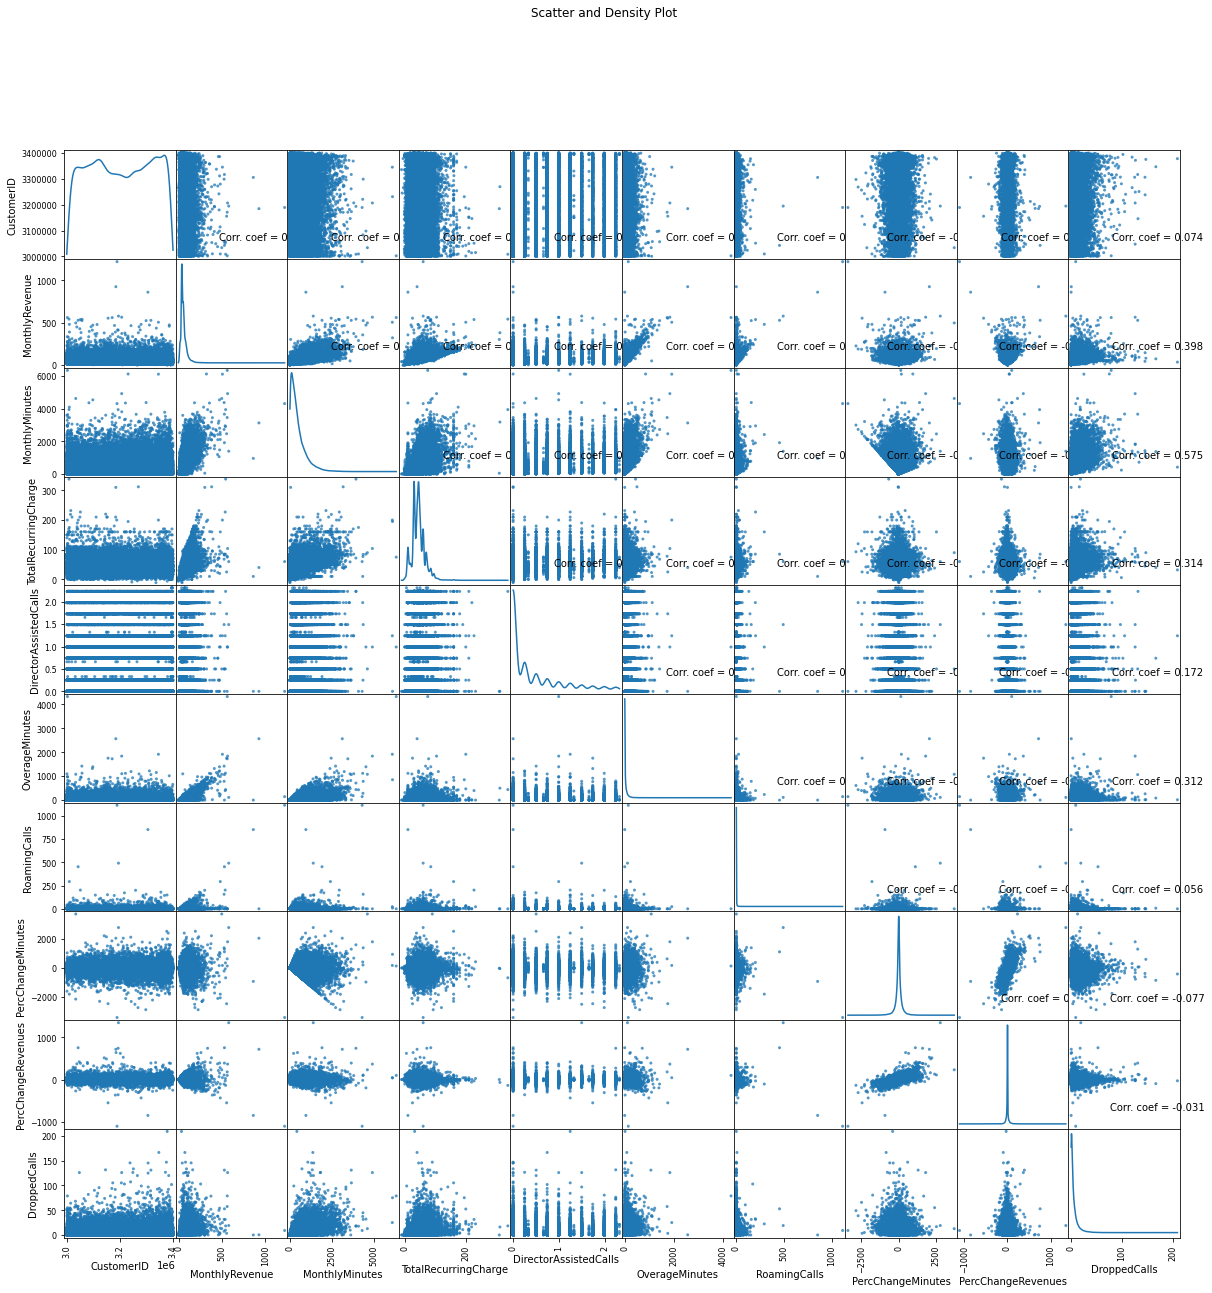

In [18]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(cust_df, 20, 10)

## Q3. Create additional features to help predict churn

In [19]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']=cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minutes']=cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    #type your code here to create any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [20]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df.head()
cust_df.info()
cust_df.describe()
cust_df.describe(include=[object])

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667,0.0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589,0.0
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,0,No,3-Good,Town,Crafts,Yes,1.0,1.000000,0.0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,10,No,4-Medium,Other,Other,No,1.0,0.911522,0.0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,1,10,No,1-Highest,Other,Professional,Yes,1.0,0.991832,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43704 entries, 0 to 51043
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 43704 non-null  int64  
 1   Churn                      43704 non-null  object 
 2   MonthlyRevenue             43704 non-null  float64
 3   MonthlyMinutes             43704 non-null  float64
 4   TotalRecurringCharge       43704 non-null  float64
 5   DirectorAssistedCalls      43704 non-null  float64
 6   OverageMinutes             43704 non-null  float64
 7   RoamingCalls               43704 non-null  float64
 8   PercChangeMinutes          43704 non-null  float64
 9   PercChangeRevenues         43704 non-null  float64
 10  DroppedCalls               43704 non-null  float64
 11  BlockedCalls               43704 non-null  float64
 12  UnansweredCalls            43704 non-null  float64
 13  CustomerCareCalls          43704 non-null  flo

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
count,4.370400e+04,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,...,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,4.369900e+04,43026.000000
mean,3.201670e+06,53.554963,466.108594,44.656782,0.361037,32.256796,1.074318,-9.755880,-0.961910,5.344355,...,21.169801,0.036381,0.017573,0.052970,4.326629,0.051528,32.965404,0.948975,inf,0.059367
std,1.164922e+05,36.905402,466.979305,21.120938,0.549543,78.750062,9.253462,230.271603,33.398994,8.197309,...,24.034393,0.203293,0.139667,0.272044,3.108486,0.379616,55.121411,0.151983,NaN,0.112376
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.953813e-01,0.000000
25%,3.100577e+06,32.637500,140.000000,30.000000,0.000000,0.000000,0.000000,-76.000000,-5.900000,0.700000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,7.642663e-01,0.000000
50%,3.201346e+06,44.515000,327.000000,45.000000,0.000000,1.000000,0.000000,-4.000000,-0.300000,2.700000,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,9.737098e-01,0.004432
75%,3.304841e+06,63.480000,638.000000,55.000000,0.500000,32.000000,0.200000,59.000000,1.200000,6.700000,...,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,30.000000,1.000000,1.119008e+00,0.074499
max,3.399974e+06,1223.380000,6336.000000,338.000000,2.310000,4321.000000,1112.400000,3712.000000,1347.000000,208.700000,...,99.000000,4.000000,3.000000,16.000000,9.000000,25.000000,500.000000,1.000000,inf,1.000000


,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
count,43704,43704,43704,43704,43704,43704,43704,43704,43704,43704,...,43704,43704,43704,43704,43704,43704,43704,43704,43704,43704
unique,2,738,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,7,4,8,3
top,No,NYCBRO917,No,No,Yes,No,No,Known,No,No,...,No,Yes,No,No,No,No,2-High,Other,Other,Unknown
freq,31085,1523,33088,37883,39214,35445,40175,29345,27636,26957,...,35434,29769,35344,37923,43110,42238,16874,21017,31957,16602


In [21]:
# Replacing infinite with nan, replace nan with zero, drop zeros
cust_df.replace([np.inf, -np.inf], np.nan, inplace=True)
cust_df.replace(np.nan, 0, inplace=True)
round(cust_df.apply(lambda x: sum(x.isnull()),axis=0) / cust_df.shape[0]*100,3)

CustomerID               0.0
Churn                    0.0
MonthlyRevenue           0.0
MonthlyMinutes           0.0
TotalRecurringCharge     0.0
                        ... 
Occupation               0.0
MaritalStatus            0.0
perc_active_subs         0.0
perc_recurrent_charge    0.0
perc_overage_minutes     0.0
Length: 61, dtype: float64

In [22]:
cust_df.describe()
cust_df.describe(include=[object])
cust_df.info()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
count,4.370400e+04,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,...,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000,43704.000000
mean,3.201670e+06,53.554963,466.108594,44.656782,0.361037,32.256796,1.074318,-9.755880,-0.961910,5.344355,...,21.169801,0.036381,0.017573,0.052970,4.326629,0.051528,32.965404,0.948975,0.924748,0.058446
std,1.164922e+05,36.905402,466.979305,21.120938,0.549543,78.750062,9.253462,230.271603,33.398994,8.197309,...,24.034393,0.203293,0.139667,0.272044,3.108486,0.379616,55.121411,0.151983,0.285862,0.111742
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.295381,0.000000
25%,3.100577e+06,32.637500,140.000000,30.000000,0.000000,0.000000,0.000000,-76.000000,-5.900000,0.700000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.764050,0.000000
50%,3.201346e+06,44.515000,327.000000,45.000000,0.000000,1.000000,0.000000,-4.000000,-0.300000,2.700000,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.973526,0.003390
75%,3.304841e+06,63.480000,638.000000,55.000000,0.500000,32.000000,0.200000,59.000000,1.200000,6.700000,...,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,30.000000,1.000000,1.118941,0.072917
max,3.399974e+06,1223.380000,6336.000000,338.000000,2.310000,4321.000000,1112.400000,3712.000000,1347.000000,208.700000,...,99.000000,4.000000,3.000000,16.000000,9.000000,25.000000,500.000000,1.000000,5.142857,1.000000


,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
count,43704,43704,43704,43704,43704,43704,43704,43704,43704,43704,...,43704,43704,43704,43704,43704,43704,43704,43704,43704,43704
unique,2,738,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,7,4,8,3
top,No,NYCBRO917,No,No,Yes,No,No,Known,No,No,...,No,Yes,No,No,No,No,2-High,Other,Other,Unknown
freq,31085,1523,33088,37883,39214,35445,40175,29345,27636,26957,...,35434,29769,35344,37923,43110,42238,16874,21017,31957,16602


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43704 entries, 0 to 51043
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 43704 non-null  int64  
 1   Churn                      43704 non-null  object 
 2   MonthlyRevenue             43704 non-null  float64
 3   MonthlyMinutes             43704 non-null  float64
 4   TotalRecurringCharge       43704 non-null  float64
 5   DirectorAssistedCalls      43704 non-null  float64
 6   OverageMinutes             43704 non-null  float64
 7   RoamingCalls               43704 non-null  float64
 8   PercChangeMinutes          43704 non-null  float64
 9   PercChangeRevenues         43704 non-null  float64
 10  DroppedCalls               43704 non-null  float64
 11  BlockedCalls               43704 non-null  float64
 12  UnansweredCalls            43704 non-null  float64
 13  CustomerCareCalls          43704 non-null  flo

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [23]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

# IU4.6.6 LinkedIn Learning 02_05_Logistic_Regression

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

y = cust_df['Churn'] 
X = cust_df.drop('Churn', 1)

#Create dummy variables for all categorical variables
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

StandardScaler()

In [25]:
# Apply transform to both the training set and the test set.
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [26]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [27]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
 
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))


prediction No
probability [[0.72324855 0.27675145]]


In [28]:
# clf.predict(X_test) 
clf.predict(X_test[0:10])

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [ ]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)


In [29]:
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

# Accuracy
score_clf = round(clf.score(X_test, y_test),3)
print(score_clf)


0.702


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          No       0.72      0.96      0.82      9290
         Yes       0.43      0.07      0.12      3822

    accuracy                           0.70     13112
   macro avg       0.57      0.52      0.47     13112
weighted avg       0.63      0.70      0.62     13112



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_clf = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm_clf, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score_clf), size = 17);
plt.tick_params(labelsize= 15)

In [ ]:
#Saving model
#We are using joblib model to serialize Python object. joblib.dump() will allow to save Python object on disk.
#save model in output directory
# !pip install joblib
# import joblib as joblib
joblib.dump(clf,'./logisticregression_model.pkl')

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [31]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set

# IU4.6.6 02_10_Random_Forests
# Regression Models
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [32]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model

print('prediction', rfc.predict(X_test[0].reshape(1,-1))[0])
print('probability', rfc.predict_proba(X_test[0].reshape(1,-1)))


prediction No
probability [[0.71 0.29]]


In [ ]:
# rfc.predict(X_test)  
rfc.predict(X_test[0:10])

In [ ]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)


In [33]:
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix

# R^2, the coefficient of determination
score_rfc = round(rfc.score(X_test, y_test),3)
print(score_rfc)

0.713


In [ ]:
# IU4.6.14 iris_classification_deploy_and_publish_demo
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc.predict(X_test)))

<Figure size 648x648 with 0 Axes>

<AxesSubplot:>

Text(60.0, 0.5, 'Actual label')

Text(0.5, 103.73999999999997, 'Predicted label')

Text(0.5, 1.0, 'Accuracy Score: 0.713')

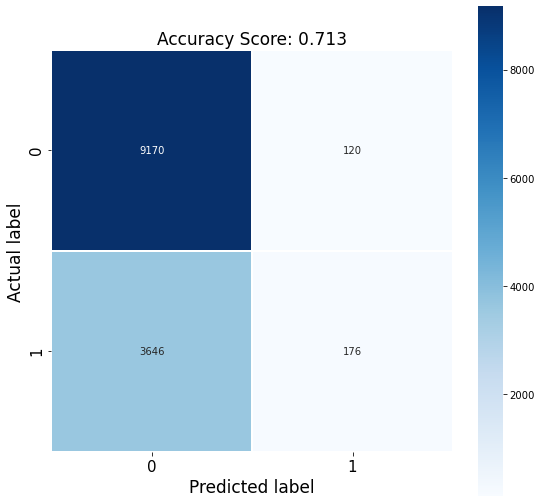

In [34]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test, rfc.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm_rfc, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score_rfc), size = 17);
plt.tick_params(labelsize= 15)

IndexError: index 805 is out of bounds for axis 0 with size 61

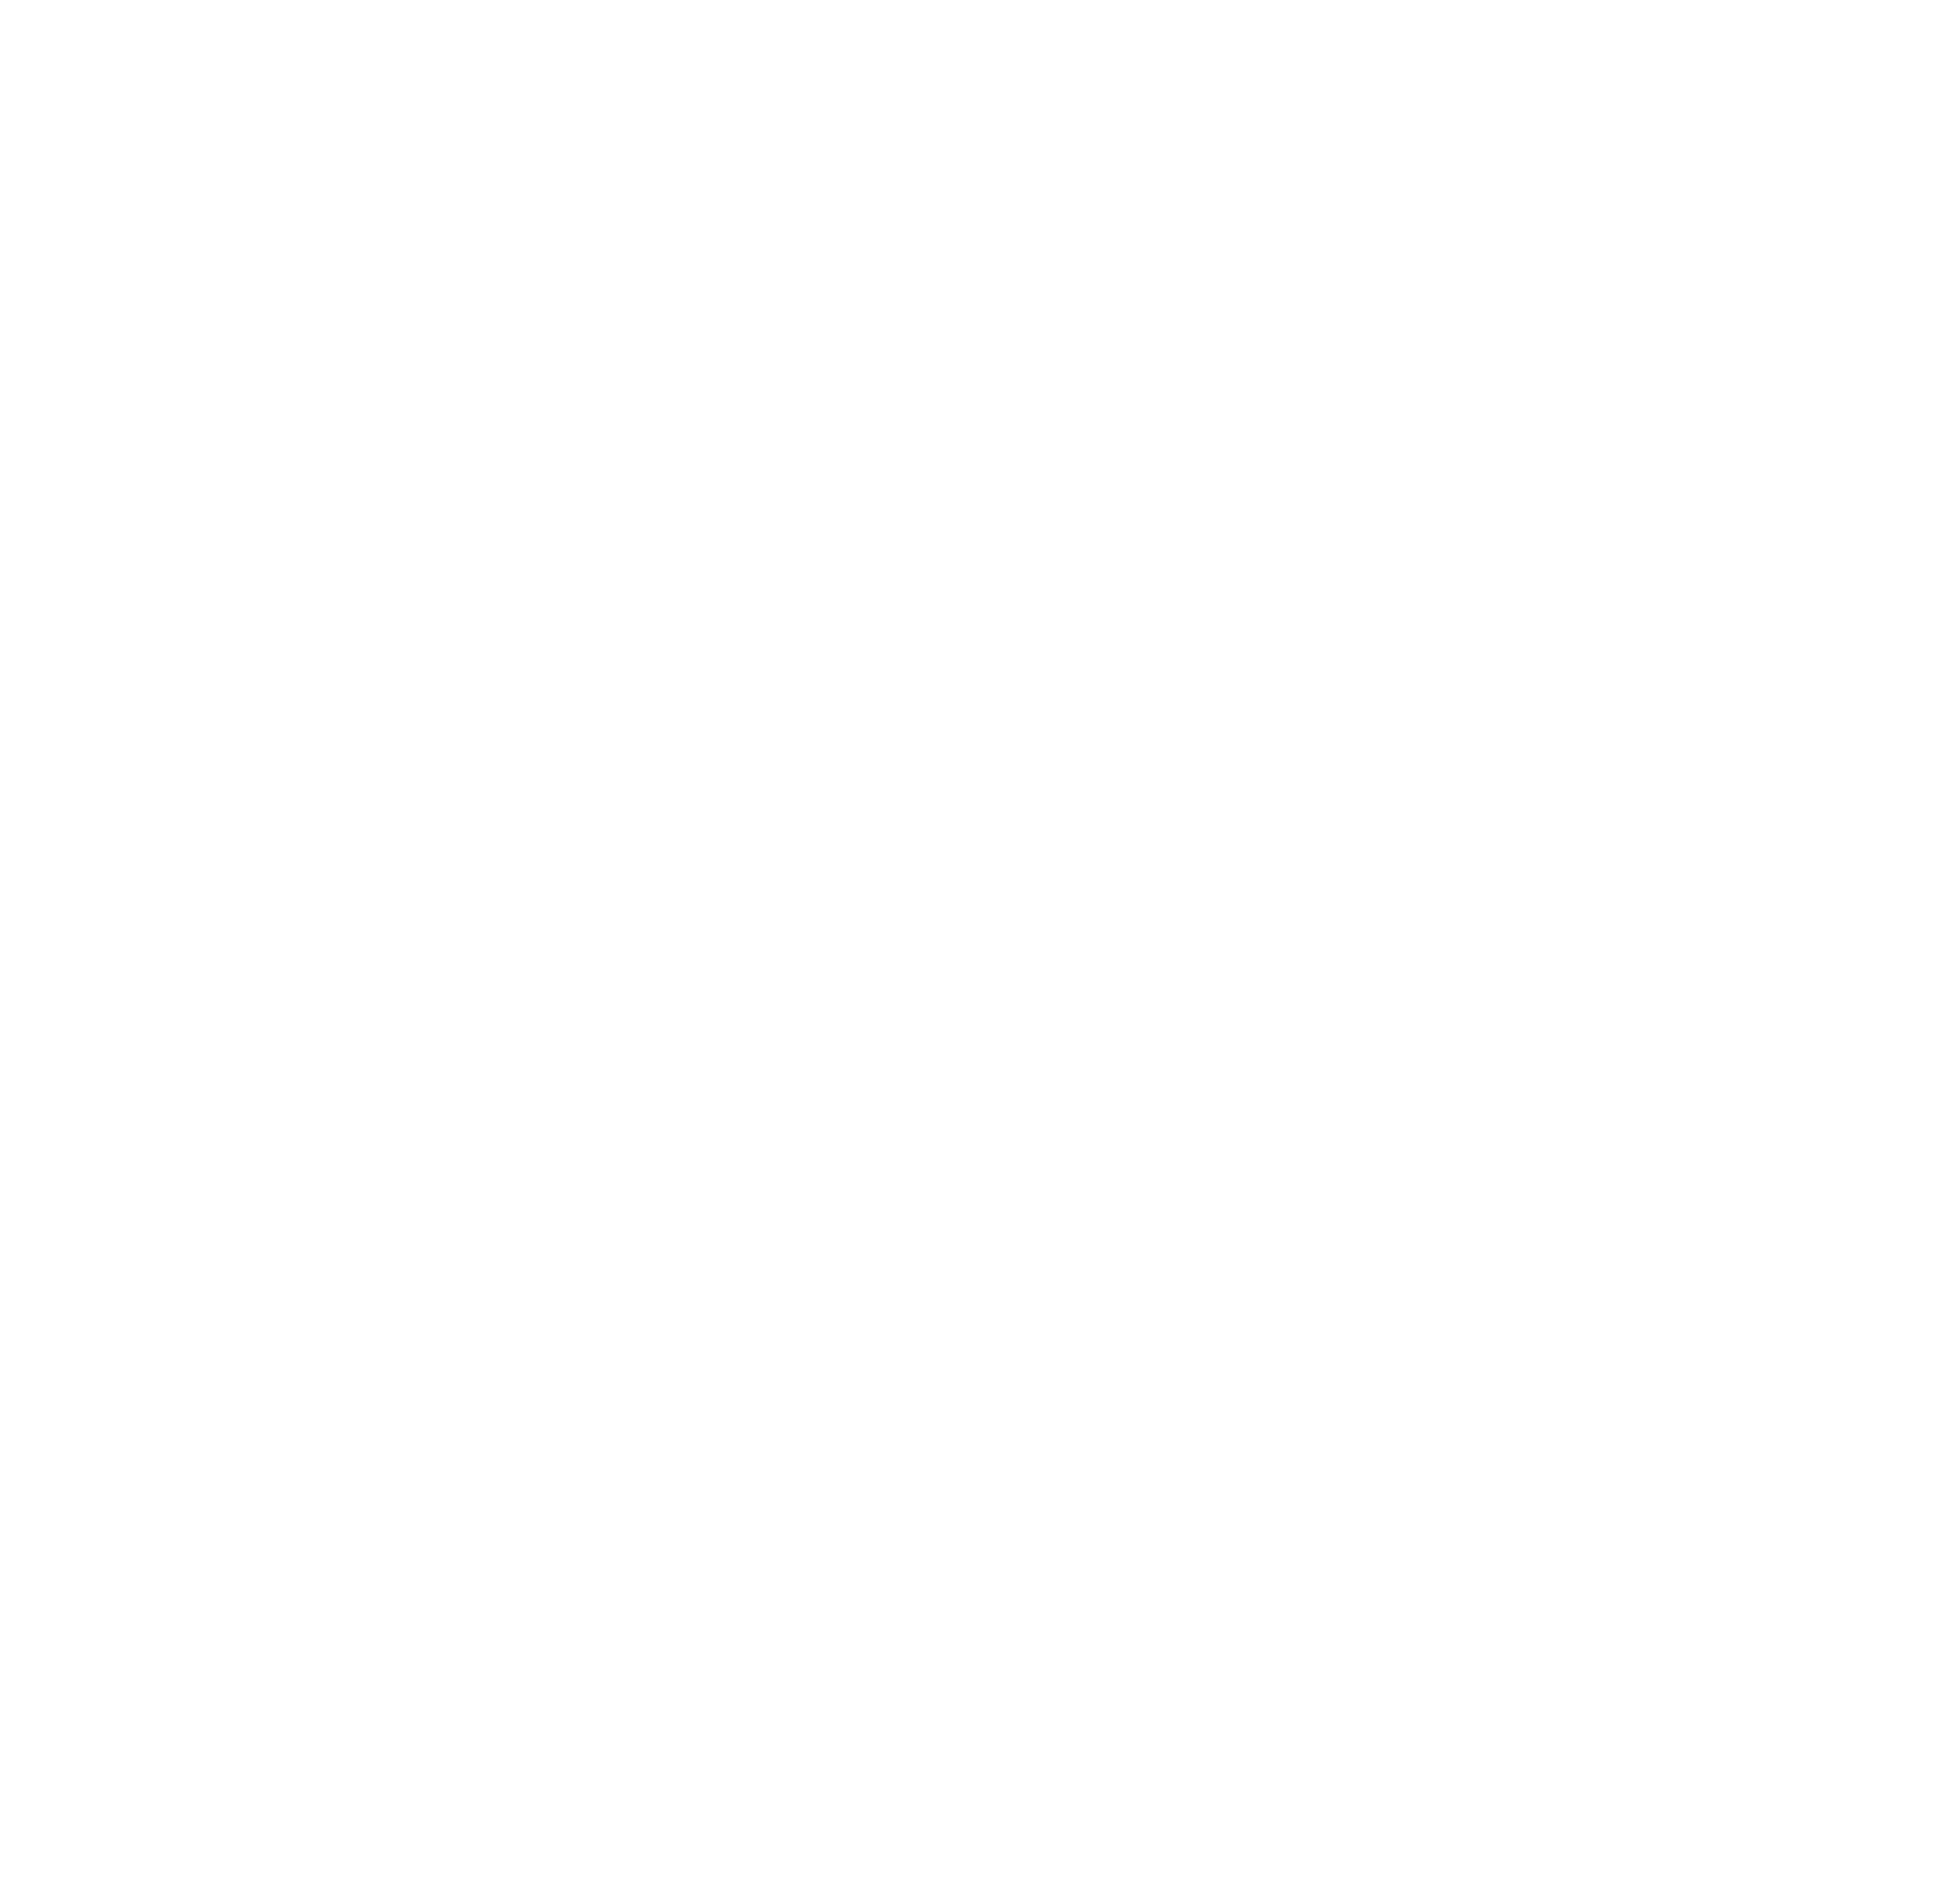

In [40]:
# To visualize individual decision trees
from sklearn import tree
from sklearn.tree import export_text

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = cust_df.columns, 
               class_names=cust_df.Churn,
               filled = True);

In [27]:
# IU4.6.14 iris_classification_deploy_and_publish_demo
# Saving model
# We are using joblib model to serialize Python object. joblib.dump() will allow to save Python object on disk.
# save model in output directory
# !pip install joblib
# import joblib as joblib
joblib.dump(rfc,'./randomforest_model.pkl')

['./randomforest_model.pkl']

In [39]:
Testscores = pd.Series([score_clf, score_rfc], 
                        index=['Logistic Regression Score','Random Forest Score' ]) 
print(Testscores)

Logistic Regression Score    0.701
Random Forest Score          0.713
dtype: float64


In [40]:
print('Random Forest Score vs Logistic Regression Score {:0.4f}%.'.format( 100 * (score_rfc - score_clf) / score_clf))

Random Forest Score vs Logistic Regression Score 1.7118%.


<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
    
    Random Forest is a better model

### Q4.3 Identify most important features impacting churn

In [19]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

# predictor_features = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
# top20feature=predictor_features[0:20]
# top20feature

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:20]


,feature,importance
27,CurrentEquipmentDays,0.043
7,PercChangeMinutes,0.036
0,CustomerID,0.035
2,MonthlyMinutes,0.035
1,MonthlyRevenue,0.032
22,MonthsInService,0.031
8,PercChangeRevenues,0.031
17,PeakCallsInOut,0.029
18,OffPeakCallsInOut,0.028
11,UnansweredCalls,0.027


## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [7]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformed data using the best fitted model object

holdout_df=pd.read_excel("Mini_project_3_Hold_Out_Data.xlsx")


In [8]:
holdout_df.shape
holdout_df.describe()
holdout_df.info()
holdout_df.head()

(20000, 58)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,2.000000e+04,0.0,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19865.000000,19865.000000,...,20000.000000,20000.000000,20000.000000,19665.000000,19665.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,3.201925e+06,NaN,58.899712,525.912136,46.946640,0.893764,40.240722,1.186765,-9.052806,-1.237246,...,1.816200,1.569550,379.550450,31.469413,21.192321,0.036500,0.017000,0.04775,4.359000,0.051250
std,1.165204e+05,NaN,43.564203,530.825481,24.083351,2.116538,95.740506,6.848963,249.609021,36.638292,...,1.348669,0.914223,255.552901,22.050726,23.882983,0.204132,0.138967,0.24119,3.134009,0.353312
min,3.000006e+06,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2518.000000,-459.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.100522e+06,NaN,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.200000,...,1.000000,1.000000,202.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,3.201338e+06,NaN,48.665000,365.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,...,1.000000,1.000000,331.000000,36.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000
75%,3.304237e+06,NaN,70.882500,718.000000,60.000000,0.990000,40.000000,0.300000,66.000000,1.600000,...,2.000000,2.000000,513.000000,48.000000,44.000000,0.000000,0.000000,0.00000,7.000000,0.000000
max,3.399986e+06,NaN,635.060000,7668.000000,350.000000,67.810000,3472.000000,488.800000,3222.000000,895.600000,...,28.000000,16.000000,1823.000000,98.000000,99.000000,4.000000,4.000000,5.00000,9.000000,14.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [9]:
holdout_df = holdout_df.drop("Churn", 1)
holdout_df.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [19]:
# Replace 'Unknown' entries in HandsetPrice feature to zeros and check that dtype is integer
holdout_df.HandsetPrice.replace("Unknown", 0, inplace=True)


In [20]:
#Q1.1 How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
holdout_df = holdout_df[holdout_df['MonthlyRevenue'].notna()]
holdout_df.shape

(19940, 57)

In [21]:
#Q1.2 Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
round(holdout_df.apply(lambda x: sum(x.isnull()),axis=0) / holdout_df.shape[0]*100,3)

CustomerID                   0.000
MonthlyRevenue               0.000
MonthlyMinutes               0.000
TotalRecurringCharge         0.000
DirectorAssistedCalls        0.000
OverageMinutes               0.000
RoamingCalls                 0.000
PercChangeMinutes            0.376
PercChangeRevenues           0.376
DroppedCalls                 0.000
BlockedCalls                 0.000
UnansweredCalls              0.000
CustomerCareCalls            0.000
ThreewayCalls                0.000
ReceivedCalls                0.000
OutboundCalls                0.000
InboundCalls                 0.000
PeakCallsInOut               0.000
OffPeakCallsInOut            0.000
DroppedBlockedCalls          0.000
CallForwardingCalls          0.000
CallWaitingCalls             0.000
MonthsInService              0.000
UniqueSubs                   0.000
ActiveSubs                   0.000
ServiceArea                  0.020
Handsets                     0.000
HandsetModels                0.000
CurrentEquipmentDays

In [22]:
holdout_df.replace(np.nan, 0, inplace=True)
round(holdout_df.apply(lambda x: sum(x.isnull()),axis=0) / holdout_df.shape[0]*100,3)

CustomerID                   0.0
MonthlyRevenue               0.0
MonthlyMinutes               0.0
TotalRecurringCharge         0.0
DirectorAssistedCalls        0.0
OverageMinutes               0.0
RoamingCalls                 0.0
PercChangeMinutes            0.0
PercChangeRevenues           0.0
DroppedCalls                 0.0
BlockedCalls                 0.0
UnansweredCalls              0.0
CustomerCareCalls            0.0
ThreewayCalls                0.0
ReceivedCalls                0.0
OutboundCalls                0.0
InboundCalls                 0.0
PeakCallsInOut               0.0
OffPeakCallsInOut            0.0
DroppedBlockedCalls          0.0
CallForwardingCalls          0.0
CallWaitingCalls             0.0
MonthsInService              0.0
UniqueSubs                   0.0
ActiveSubs                   0.0
ServiceArea                  0.0
Handsets                     0.0
HandsetModels                0.0
CurrentEquipmentDays         0.0
AgeHH1                       0.0
AgeHH2    

<AxesSubplot:>

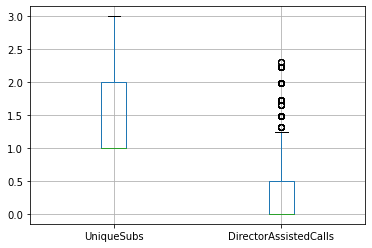

In [38]:
#Q1.3 plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [10]:
#Q3 wrapper function to create additional features for churn prediction
def create_features(holdout_df):

    holdout_df['perc_active_subs'] = holdout_df['ActiveSubs'] / holdout_df['UniqueSubs']
    holdout_df['perc_recurrent_charge']=holdout_df['TotalRecurringCharge'] / holdout_df['MonthlyRevenue']
    holdout_df['perc_overage_minutes']=holdout_df['OverageMinutes'] / holdout_df['MonthlyMinutes']  
    
    return holdout_df  

holdout_df=create_features(holdout_df)
holdout_df.head()
holdout_df.describe()
holdout_df.info()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,1,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,2,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,3,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,1,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
count,2.000000e+04,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19865.000000,19865.000000,20000.00000,...,19665.000000,19665.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,19938.000000,19646.000000
mean,3.201925e+06,58.899712,525.912136,46.946640,0.893764,40.240722,1.186765,-9.052806,-1.237246,6.00466,...,31.469413,21.192321,0.036500,0.017000,0.04775,4.359000,0.051250,0.936024,0.902726,0.062587
std,1.165204e+05,43.564203,530.825481,24.083351,2.116538,95.740506,6.848963,249.609021,36.638292,8.91097,...,22.050726,23.882983,0.204132,0.138967,0.24119,3.134009,0.353312,0.169230,0.289169,0.111504
min,3.000006e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2518.000000,-459.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100522e+06,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.200000,0.70000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.727509,0.000000
50%,3.201338e+06,48.665000,365.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,3.00000,...,36.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000,1.000000,0.952878,0.008396
75%,3.304237e+06,70.882500,718.000000,60.000000,0.990000,40.000000,0.300000,66.000000,1.600000,7.70000,...,48.000000,44.000000,0.000000,0.000000,0.00000,7.000000,0.000000,1.000000,1.097741,0.082853
max,3.399986e+06,635.060000,7668.000000,350.000000,67.810000,3472.000000,488.800000,3222.000000,895.600000,195.30000,...,98.000000,99.000000,4.000000,4.000000,5.00000,9.000000,14.000000,1.000000,4.109589,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   MonthlyRevenue             19940 non-null  float64
 2   MonthlyMinutes             19940 non-null  float64
 3   TotalRecurringCharge       19940 non-null  float64
 4   DirectorAssistedCalls      19940 non-null  float64
 5   OverageMinutes             19940 non-null  float64
 6   RoamingCalls               19940 non-null  float64
 7   PercChangeMinutes          19865 non-null  float64
 8   PercChangeRevenues         19865 non-null  float64
 9   DroppedCalls               20000 non-null  float64
 10  BlockedCalls               20000 non-null  float64
 11  UnansweredCalls            20000 non-null  float64
 12  CustomerCareCalls          20000 non-null  float64
 13  ThreewayCalls              20000 non-null  flo

In [11]:
# holdout_df.replace([np.inf, -np.inf], np.nan, inplace=True)
holdout_df.replace(np.nan, 0, inplace=True)
round(holdout_df.apply(lambda x: sum(x.isnull()),axis=0) / holdout_df.shape[0]*100,3)

CustomerID                   0.0
MonthlyRevenue               0.0
MonthlyMinutes               0.0
TotalRecurringCharge         0.0
DirectorAssistedCalls        0.0
OverageMinutes               0.0
RoamingCalls                 0.0
PercChangeMinutes            0.0
PercChangeRevenues           0.0
DroppedCalls                 0.0
BlockedCalls                 0.0
UnansweredCalls              0.0
CustomerCareCalls            0.0
ThreewayCalls                0.0
ReceivedCalls                0.0
OutboundCalls                0.0
InboundCalls                 0.0
PeakCallsInOut               0.0
OffPeakCallsInOut            0.0
DroppedBlockedCalls          0.0
CallForwardingCalls          0.0
CallWaitingCalls             0.0
MonthsInService              0.0
UniqueSubs                   0.0
ActiveSubs                   0.0
ServiceArea                  0.0
Handsets                     0.0
HandsetModels                0.0
CurrentEquipmentDays         0.0
AgeHH1                       0.0
AgeHH2    

In [25]:
holdout_df.describe()
holdout_df.info()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
count,1.994000e+04,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,...,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000
mean,3.201617e+06,58.899712,525.912136,46.946640,0.893764,40.240722,1.186765,-9.018756,-1.232593,6.010246,...,20.845988,0.036510,0.017051,0.047844,4.357974,0.050903,36.461384,0.936011,0.902635,0.061665
std,1.162860e+05,43.564203,530.825481,24.083351,2.116538,95.740506,6.848963,249.139746,36.569399,8.912513,...,23.840281,0.204201,0.139173,0.241445,3.133606,0.352769,57.444411,0.169223,0.289296,0.110936
min,3.000006e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2518.000000,-459.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100475e+06,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.100000,0.700000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.727374,0.000000
50%,3.201078e+06,48.665000,365.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,3.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.952817,0.007082
75%,3.303782e+06,70.882500,718.000000,60.000000,0.990000,40.000000,0.300000,66.000000,1.500000,7.700000,...,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,60.000000,1.000000,1.097741,0.080847
max,3.399938e+06,635.060000,7668.000000,350.000000,67.810000,3472.000000,488.800000,3222.000000,895.600000,195.300000,...,99.000000,4.000000,4.000000,5.000000,9.000000,14.000000,500.000000,1.000000,4.109589,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19940 entries, 0 to 19995
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 19940 non-null  int64  
 1   MonthlyRevenue             19940 non-null  float64
 2   MonthlyMinutes             19940 non-null  float64
 3   TotalRecurringCharge       19940 non-null  float64
 4   DirectorAssistedCalls      19940 non-null  float64
 5   OverageMinutes             19940 non-null  float64
 6   RoamingCalls               19940 non-null  float64
 7   PercChangeMinutes          19940 non-null  float64
 8   PercChangeRevenues         19940 non-null  float64
 9   DroppedCalls               19940 non-null  float64
 10  BlockedCalls               19940 non-null  float64
 11  UnansweredCalls            19940 non-null  float64
 12  CustomerCareCalls          19940 non-null  float64
 13  ThreewayCalls              19940 non-null  flo

In [13]:
#Create dummy variables for all categorical variables
holdout_df = pd.get_dummies(holdout_df)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(holdout_df)
sc.transform(holdout_df)

StandardScaler()

array([[-1.73294982, -0.0282692 , -0.0778726 , ...,  1.72012447,
        -0.78620797, -0.75881208],
       [-1.73284683, -0.08008407,  0.08603243, ...,  1.72012447,
        -0.78620797, -0.75881208],
       [-1.73270951,  0.885369  ,  0.9696124 , ..., -0.58135328,
        -0.78620797,  1.31784934],
       ...,
       [ 1.69966669, -1.34633847, -0.98782809, ...,  1.72012447,
        -0.78620797, -0.75881208],
       [ 1.69970102, -1.34633847, -0.98782809, ..., -0.58135328,
         1.27192808, -0.75881208],
       [ 1.69983834, -1.34633847, -0.98782809, ..., -0.58135328,
        -0.78620797,  1.31784934]])

In [2]:
# IU4.6.14 iris_classification_deploy_and_publish_demo
#Load trained model
#declare path where you saved your model
import joblib as joblib
filePath = 'randomforest_model.pkl'
#open file
file = open(filePath, "rb")
#load the trained model
trained_model = joblib.load(file)

In [21]:
#convert holdout_df into numpy array
# holdout_df = np.array(holdout_df)

#Predict with trained model
prediction = trained_model.predict(holdout_df.reshape(1,-1))
print(prediction)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [23]:
# print('prediction', trained_model.predict(holdout_df[0].reshape(1,-1))[0])
# print('probability', trained_model.predict_proba(holdout_df[0].reshape(1,-1)))

trained_model.predict(holdout_df.values.reshape(1,-1))  


ValueError: Number of features of the model must match the input. Model n_features is 828 and input n_features is 15340000 

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [4]:
# ! pip install scikit-plot

In [22]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)

# https://towardsdatascience.com/meaningful-metrics-cumulative-gains-and-lyft-charts-7aac02fc5c14 

import scikitplot as skplt 

# Deriving Class probabilities 
predicted_probabilities = rfc.predict_proba(X_test) 

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

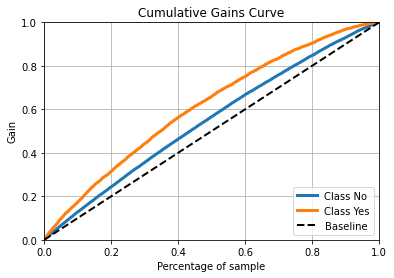

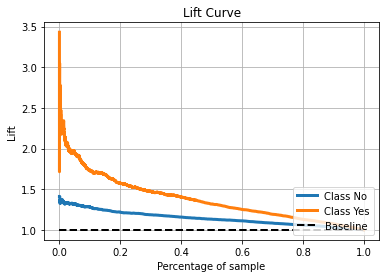

In [23]:
# Creating the plot 
# Cumulative Gains curve: It shows the percentage of targets reached when considering a certain percentage of the population with the 
# highest probability to be target according to the model.
# lift curve: indicates how many times more than average targets are included in this group
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities) 
skplt.metrics.plot_lift_curve(y_test, predicted_probabilities) 

<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
    
    30%, Random pick is 25%
    
    Lift is 1.6x
    
    
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   